# Analysis of SAT annotations

9/8/2020

Shahreen Pysche and Javier Osorio

## Background

This script conducts a preliminary descriptive analysis of human annotations of terrorist activity of the South Asia Terrorism Portal (SATP) between 2016 and 2018. 

To code terrorist activity, we will use the guidelines of the Global Terrorism Database (GTD) project.

To conduct the annotations, we count with a team of three human coders that reached a XXXX% of inter-coder reliability in the training stage.

So far, we have completed the following rounds of annotations:
* Round 1: 1,500 stories (each coder has 500 stories)
* Round 2: 1,500 stories (each coder has 500 stories)
* Round 3: 1,500 stories (each coder has 500 stories)
* Round 4: In progress
* Total up today: **4,500**


## Load the necessary libraries

This is a new version

In [32]:
"""

    * Pandas is a software library written for the Python programming language for data manipulation and analysis.
    * Matplotlib & seaborn are plotting libraries.
    * NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays 
      and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
    * csv is a library which helps to process csv files.
    * collections is a library which supports some external data structures.

"""

# Importing libraries for analyzing the annotated SATP news reports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import collections
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,13)})
plt.style.use('ggplot')


In [33]:
# Defining an array which holds the names of the components of the events

EVENTS = ['target', 'source', 'action', 'location', 'date', 'action_type', 'target_group', 'action_group', 'source_group']

## Data Processing Functions

First, we need to define a set of functions that will help us process the data later on.

* **process_column**: This function converts the string into arrays and fills in NAs
* **proceess_text**: This function cleans extra spaces within the labels
* **get_unique**: This function deduplicates the content of each cell leaving a unique value

In [34]:
"""

    This function processes the string to arraytype for each row and also fills up the null values
    
    INPUT - df - Dataframe
            col - Name of the column. The column is a string type column
    

"""
def process_column(df, col):
    df.fillna("NotSpecified", inplace=True)
    df[col] = df[col].str.strip('[]').str.split(',')
    #df[col] = df[col].apply(my_function)
    
"""

    This function processes the text and gets rid off the extra spaces within the labels
    
    Input - Array of Strings
    
    Example - Input - ['  ArmedAssault', 'ArmedAssault  ']
              Output - ['ArmedAssault', 'ArmedAssault']
    
    

"""
def proceess_text(data):
    for i in range(len(data)):
        data[i] = ''.join(c for c in data[i] if c not in '"')
        data[i] = ''.join(c for c in data[i] if c not in '\'')
        data[i] = data[i].strip()

"""

    This function retrives the distinct labels from each row of a particular column
    
    INPUT - Column Values
    
    Example - Input - ['ArmedAssault', 'ArmedAssault']
              Output - ['ArmedAssault']

"""      
        
def get_unique(data):
    for i in range(len(data)):
        # print(data[i])
        proceess_text(data[i])
        data[i] = list(set(data[i]))
    
    
    

The annotations are currently formatted as an array nested within another array. For example: 

[['kidnapped', 'killed'], ['injured']]

This makes it very difficult to work with the data.  

The **flatten_list** function "flattens" the annotations to generate an array containing strings, such as:

['kidnapped', 'killed','injured']
    

In [35]:
import itertools
from collections import defaultdict

"""
    
    This function takes an nested list of strings. After that it flattens the entire array. For example,
    [['kidnapped', 'killed'], ['injured']] becomes ['kidnapped', 'killed','injured']. The reason for doing
    this is that we dont want any duplicates. That is why we are getting rid off the redudancies. 
    
    This function also can produce the Top K labels of given column with its respective counts.

"""

def flatten_list(data, K):
    # get_unique(data)
    flatten = list(itertools.chain.from_iterable(data))
    #proceess_text(flatten)
    records = defaultdict(int)
    track = []
    for i in flatten:
        records[i] += 1
    for k, v in records.items():
        track.append((v, k))
    track.sort(key = lambda x : [-x[0]])
    if K > 0:
        track = track[0:K]
    keep = set()
    for i in track:
        keep.add(i[1])
    final_list = []
    for i in flatten:
        if i in keep:
            final_list.append(i)
    return final_list

## Read and Check Data

Import the data from .csv files and create a data frame (df).

In [36]:
# Importing data from csv file

############## First Round Data ##################
# p1 = pd.read_csv('Data/p1.csv', header=[0])
# p2 = pd.read_csv('Data/p2.csv', header=[0])
# p3 = pd.read_csv('Data/p3.csv', header=[0])

# ############## Second Round Data ##################
# p4 = pd.read_csv('Data/p4.csv', header=[0])
# p5 = pd.read_csv('Data/p5.csv', header=[0])
# p6 = pd.read_csv('Data/p6.csv', header=[0])

# # Concatenate all objects
# df = pd.concat([p1, p2, p3, p4, p5, p6], ignore_index=True)
event_root = "/Users/shahreenshahjahanpsyche/Desktop/SATP-Event-Classification/Data_Annotated/"
df = pd.read_csv(event_root + 'master.csv', header=[0])

Display a few rows of the data

In [37]:
df.head(5)

,id,is_relevant,target,source,action,action_type,location,date,country,year,news,target_group,action_group,source_group
0,32355,True,"['Rangers', 'Military Police']","['militants', 'Lashkar e Jhangvi LeJ']","['gunned', 'killed', 'killing']",['Armed Assault'],['Karachi'],['December 6'],pakistan,2016,Two Lashkar e Jhangvi LeJ militants Asim alias...,"['Military', 'Military']","['gun attack', 'killed', 'killed']","['Attackers', 'Lashkar e Jhangvi']"
1,32398,True,"['Security Forces', 'civilians', 'SFs']",['NotSpecified'],"['killed', 'killing', 'fighting', 'wounded']",['Unknown'],['NotSpecified'],['December 20'],pakistan,2016,The Commander Southern Command Lieutenant Gene...,"['Military', 'Private Citizen and Property', '...","['killed', 'killed', 'fighting', 'wounded']",['Unknown Source']
2,29171,True,"['Nagas', 'Naga']","['MNPF', 'Manipur Naga Peopleâ€™s Front']","['attack', 'bomb', 'explosion', 'exploded']",['Bombing/Explosion'],['NotSpecified'],['August 30'],india,2016,Meanwhile the underground organization Manipur...,"['Naga National Council', 'Naga National Counc...","['attack', 'bomb', 'exploded', 'exploded']","['Manipur Naga Peoples Front', 'Manipur Naga P..."
3,25445,True,"['Artisan Restaurant', 'hostages', 'foreigners']","['suicide fighters', 'suicide soldiers', 'atta...","['gun battle', 'killing', 'injuring']",['Armed Assault'],['Dhaka'],"['27th', 'August']",bangladesh,2016,Islamic State IS in the latest issue of its on...,"['Business', 'Private Citizen and Property', '...","['gun attack', 'killed', 'injured']","['Attackers', 'Attackers', 'Attackers']"
4,31739,True,"['MQM', 'Muttahida Qaumi Movement']",['NotSpecified'],['shot'],['Assassination'],"['Karachi', 'Naeemabad', 'Sindh', 'Korangi']",['June 19'],pakistan,2016,A senior Muttahida Qaumi Movement MQM worker i...,"['Muttahida Qaumi Movement', 'Muttahida Qaumi ...",['shot'],['Unknown Source']


Show the structure of the data (rows, columns)

In [38]:
print(df.shape)

(4500, 14)


Now, create the 'EVENTS' object and conver the strings to arrays

In [39]:
# process - masteer
for i in EVENTS:
    process_column(df, i)
    get_unique(df[i])

/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Show a few rows to see how it is looking

In [40]:
df.head() # [[ArmedAssault], [Bombing]] --> [ArmedAssault, Bombing]

,id,is_relevant,target,source,action,action_type,location,date,country,year,news,target_group,action_group,source_group
0,32355,True,"[Military Police, Rangers]","[Lashkar e Jhangvi LeJ, militants]","[killing, gunned, killed]",[Armed Assault],[Karachi],[December 6],pakistan,2016,Two Lashkar e Jhangvi LeJ militants Asim alias...,[Military],"[gun attack, killed]","[Attackers, Lashkar e Jhangvi]"
1,32398,True,"[SFs, Security Forces, civilians]",[NotSpecified],"[wounded, fighting, killing, killed]",[Unknown],[NotSpecified],[December 20],pakistan,2016,The Commander Southern Command Lieutenant Gene...,"[Private Citizen and Property, Military]","[wounded, fighting, killed]",[Unknown Source]
2,29171,True,"[Naga, Nagas]","[Manipur Naga Peopleâ€™s Front, MNPF]","[exploded, bomb, attack, explosion]",[Bombing/Explosion],[NotSpecified],[August 30],india,2016,Meanwhile the underground organization Manipur...,[Naga National Council],"[bomb, attack, exploded]",[Manipur Naga Peoples Front]
3,25445,True,"[Artisan Restaurant, hostages, foreigners]","[suicide soldiers, attackers, suicide fighters]","[gun battle, killing, injuring]",[Armed Assault],[Dhaka],"[August, 27th]",bangladesh,2016,Islamic State IS in the latest issue of its on...,"[Private Citizen and Property, Business]","[gun attack, injured, killed]",[Attackers]
4,31739,True,"[Muttahida Qaumi Movement, MQM]",[NotSpecified],[shot],[Assassination],"[Sindh, Korangi, Naeemabad, Karachi]",[June 19],pakistan,2016,A senior Muttahida Qaumi Movement MQM worker i...,[Muttahida Qaumi Movement],[shot],[Unknown Source]


Show a slice of the data using the 'df.loc' function.

Notice that there are no spaces between words.

In [41]:
# First term indicates the row (e.g. for row 0 use [0, :])
# The second term indicates the column (e.g. for col 3 use [2]) - counter starts in 0
# Thr third term selects the item of the list within the column (e.g. for first item use [0])

df.loc[0, :][2][0]

'Military Police'

# Data Visulization

## 1. 0 - Ratio - Relevant vs Not Relevant

Identify the proportion of relevant and irrelevant news stories.

In [42]:
# Calculate number of relevant stories
total = len(df)
n_relevant = len(df[df['is_relevant'] == True])
n_not_relevant = (total - len(df[df['is_relevant'] == True]))

# Calculate proportion of relevant and not relevant
p_relevant = (len(df[df['is_relevant'] == True])/total)*100
p_not_relevant = ((total - len(df[df['is_relevant'] == True]))/total)*100

# Print results

print('#################################################')
print('Two rounds of annotations led to 4,500 articles')
print('3 URAs x 500 articles x 3 rounds')
print('\n')
print("Number of Relevant news =", n_relevant)
print("Number of Not Relevant news =", n_not_relevant)
print('\n')
print("Proportion of Relevant news =", p_relevant, "%")
print("Proportion of Not Relevant news =", p_not_relevant, "%")
print('\n')
print('#################################################')


df = df[df['is_relevant'] == True]


#################################################
Two rounds of annotations led to 4,500 articles
3 URAs x 500 articles x 3 rounds


Number of Relevant news = 727
Number of Not Relevant news = 3773


Proportion of Relevant news = 16.155555555555555 %
Proportion of Not Relevant news = 83.84444444444445 %


#################################################


## 1.1 Event Distribution

Explore the distribution of events.

The code belows creates a set of objects containing the information of source, action, and target.

In [43]:
# I am not sure what this does.

K = -1   # K is the number of labels per column, right? But, why is K=-1?

action = flatten_list(df['action_group'].values, K)
target = flatten_list(df['target_group'].values, K)
source = flatten_list(df['source_group'].values, K)
action_type = flatten_list(df['action_type'].values, K)

## Type of Terrorist Attack

Tabulate the frequency of different types of terrorist attacks.

In [44]:
from collections import Counter

Counter(action_type)

Counter({'Armed Assault': 309,
         'Unknown': 90,
         'Bombing/Explosion': 222,
         'Assassination': 48,
         'Facility/Infrastructure Attack': 61,
         'NotSpecified': 75,
         'Hijacking': 6,
         'Unarmed Assault': 30,
         'Kidnapping': 58,
         'Barricade Incident': 1})

Generate a histogram of terrorist attacks.

[Text(0, 0, 'Armed Assault'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Bombing/Explosion'),
 Text(0, 0, 'Assassination'),
 Text(0, 0, 'Facility/Infrastructure Attack'),
 Text(0, 0, 'NotSpecified'),
 Text(0, 0, 'Hijacking'),
 Text(0, 0, 'Unarmed Assault'),
 Text(0, 0, 'Kidnapping'),
 Text(0, 0, 'Barricade Incident')]

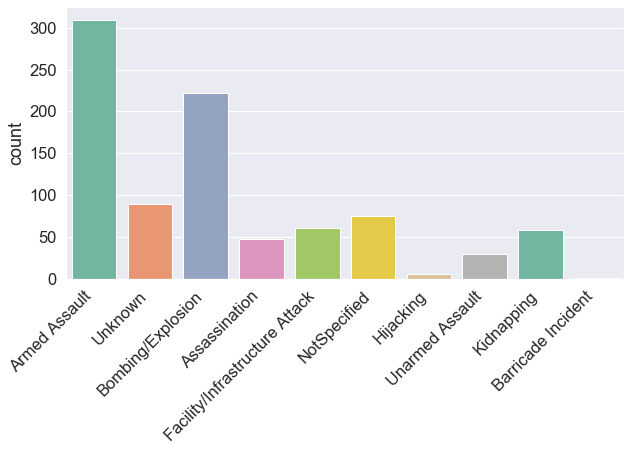

In [45]:
# Import graph library
import seaborn as sns
import matplotlib.pyplot as plt 

# Set the font size
sns.set(font_scale = 1.5)

# Create figure frame 
plt.figure(figsize=(10,5))

# Plot the figure
chart = sns.countplot(x=action_type, palette = "Set2")

# Rotate labels in the X axis
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

## Country Specific

Now, let's analyze the distribution of terrorist attacks by counry.

Start by creating the object 'COUNTRY' containing the list of annotated locations.

In [46]:
COUNTRIES = list(set(df["country"]))
COUNTRIES

['nepal', 'pakistan', 'afghanistan', 'bangladesh', 'srilanka', 'india']

In [47]:
# Same here. Not sure what it does.

K = 10  # Is this taking 10 labels per column? Not sure how this works.

df_by_country = df[df['country'] == COUNTRIES[0]]

action = flatten_list(df_by_country['action_group'].values, K)
target = flatten_list(df_by_country['target_group'].values, K)
source = flatten_list(df_by_country['source_group'].values, K)
action_type = flatten_list(df_by_country['action_type'].values, K)

In [48]:
df.head()

,id,is_relevant,target,source,action,action_type,location,date,country,year,news,target_group,action_group,source_group
0,32355,True,"[Military Police, Rangers]","[Lashkar e Jhangvi LeJ, militants]","[killing, gunned, killed]",[Armed Assault],[Karachi],[December 6],pakistan,2016,Two Lashkar e Jhangvi LeJ militants Asim alias...,[Military],"[gun attack, killed]","[Attackers, Lashkar e Jhangvi]"
1,32398,True,"[SFs, Security Forces, civilians]",[NotSpecified],"[wounded, fighting, killing, killed]",[Unknown],[NotSpecified],[December 20],pakistan,2016,The Commander Southern Command Lieutenant Gene...,"[Private Citizen and Property, Military]","[wounded, fighting, killed]",[Unknown Source]
2,29171,True,"[Naga, Nagas]","[Manipur Naga Peopleâ€™s Front, MNPF]","[exploded, bomb, attack, explosion]",[Bombing/Explosion],[NotSpecified],[August 30],india,2016,Meanwhile the underground organization Manipur...,[Naga National Council],"[bomb, attack, exploded]",[Manipur Naga Peoples Front]
3,25445,True,"[Artisan Restaurant, hostages, foreigners]","[suicide soldiers, attackers, suicide fighters]","[gun battle, killing, injuring]",[Armed Assault],[Dhaka],"[August, 27th]",bangladesh,2016,Islamic State IS in the latest issue of its on...,"[Private Citizen and Property, Business]","[gun attack, injured, killed]",[Attackers]
4,31739,True,"[Muttahida Qaumi Movement, MQM]",[NotSpecified],[shot],[Assassination],"[Sindh, Korangi, Naeemabad, Karachi]",[June 19],pakistan,2016,A senior Muttahida Qaumi Movement MQM worker i...,[Muttahida Qaumi Movement],[shot],[Unknown Source]


Tabulate frequency of attacks per country

In [49]:
# Tabulate the action types (again ?)). That is not right
#Counter(action_type)

# I think we should tabulate countries here.

Counter(df['country'])

Counter({'pakistan': 218,
         'india': 430,
         'bangladesh': 33,
         'nepal': 7,
         'afghanistan': 38,
         'srilanka': 1})

Plot frequency by country

[Text(0, 0, 'pakistan'),
 Text(0, 0, 'india'),
 Text(0, 0, 'bangladesh'),
 Text(0, 0, 'nepal'),
 Text(0, 0, 'afghanistan'),
 Text(0, 0, 'srilanka')]

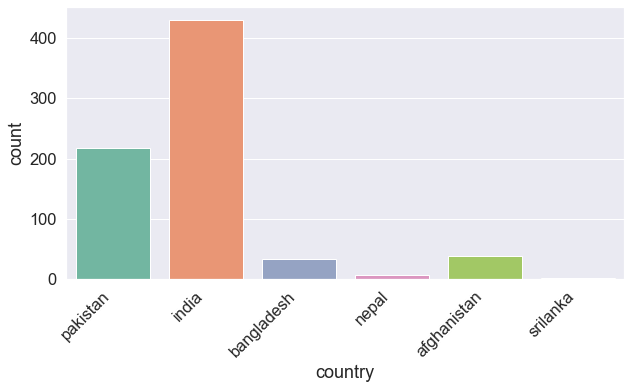

In [50]:
# Bar plot by country

# Set the font size
sns.set(font_scale = 1.5)

# Create figure frame 
plt.figure(figsize=(10,5))

# Plot the figure
chart = sns.countplot(x=df['country'], palette = "Set2")

# Rotate labels in the X axis
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


## Action-Type Count By Country

Generate graphs by country and type of action.

First create another data frame.

In [51]:
df_action = df.copy()
df_action = df_action.explode('action_type')
df_action.head(5)

,id,is_relevant,target,source,action,action_type,location,date,country,year,news,target_group,action_group,source_group
0,32355,True,"[Military Police, Rangers]","[Lashkar e Jhangvi LeJ, militants]","[killing, gunned, killed]",Armed Assault,[Karachi],[December 6],pakistan,2016,Two Lashkar e Jhangvi LeJ militants Asim alias...,[Military],"[gun attack, killed]","[Attackers, Lashkar e Jhangvi]"
1,32398,True,"[SFs, Security Forces, civilians]",[NotSpecified],"[wounded, fighting, killing, killed]",Unknown,[NotSpecified],[December 20],pakistan,2016,The Commander Southern Command Lieutenant Gene...,"[Private Citizen and Property, Military]","[wounded, fighting, killed]",[Unknown Source]
2,29171,True,"[Naga, Nagas]","[Manipur Naga Peopleâ€™s Front, MNPF]","[exploded, bomb, attack, explosion]",Bombing/Explosion,[NotSpecified],[August 30],india,2016,Meanwhile the underground organization Manipur...,[Naga National Council],"[bomb, attack, exploded]",[Manipur Naga Peoples Front]
3,25445,True,"[Artisan Restaurant, hostages, foreigners]","[suicide soldiers, attackers, suicide fighters]","[gun battle, killing, injuring]",Armed Assault,[Dhaka],"[August, 27th]",bangladesh,2016,Islamic State IS in the latest issue of its on...,"[Private Citizen and Property, Business]","[gun attack, injured, killed]",[Attackers]
4,31739,True,"[Muttahida Qaumi Movement, MQM]",[NotSpecified],[shot],Assassination,"[Sindh, Korangi, Naeemabad, Karachi]",[June 19],pakistan,2016,A senior Muttahida Qaumi Movement MQM worker i...,[Muttahida Qaumi Movement],[shot],[Unknown Source]


Now, pivot the database for countries and types of actions

In [52]:
aggregated = df_action.pivot_table(index = 'country', columns = 'action_type', aggfunc='size', fill_value=0)
aggregated

action_type,Armed Assault,Assassination,Barricade Incident,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Kidnapping,NotSpecified,Unarmed Assault,Unknown
country,,,,,,,,,,
afghanistan,2,1,0,13,3,1,4,5,0,17
bangladesh,13,5,0,10,2,1,0,3,2,6
india,189,13,1,115,48,3,49,52,28,56
nepal,0,0,0,5,1,0,0,1,0,0
pakistan,105,29,0,79,7,1,5,14,0,10
srilanka,0,0,0,0,0,0,0,0,0,1


Generate a plot for different actions per country

<Figure size 720x360 with 0 Axes>

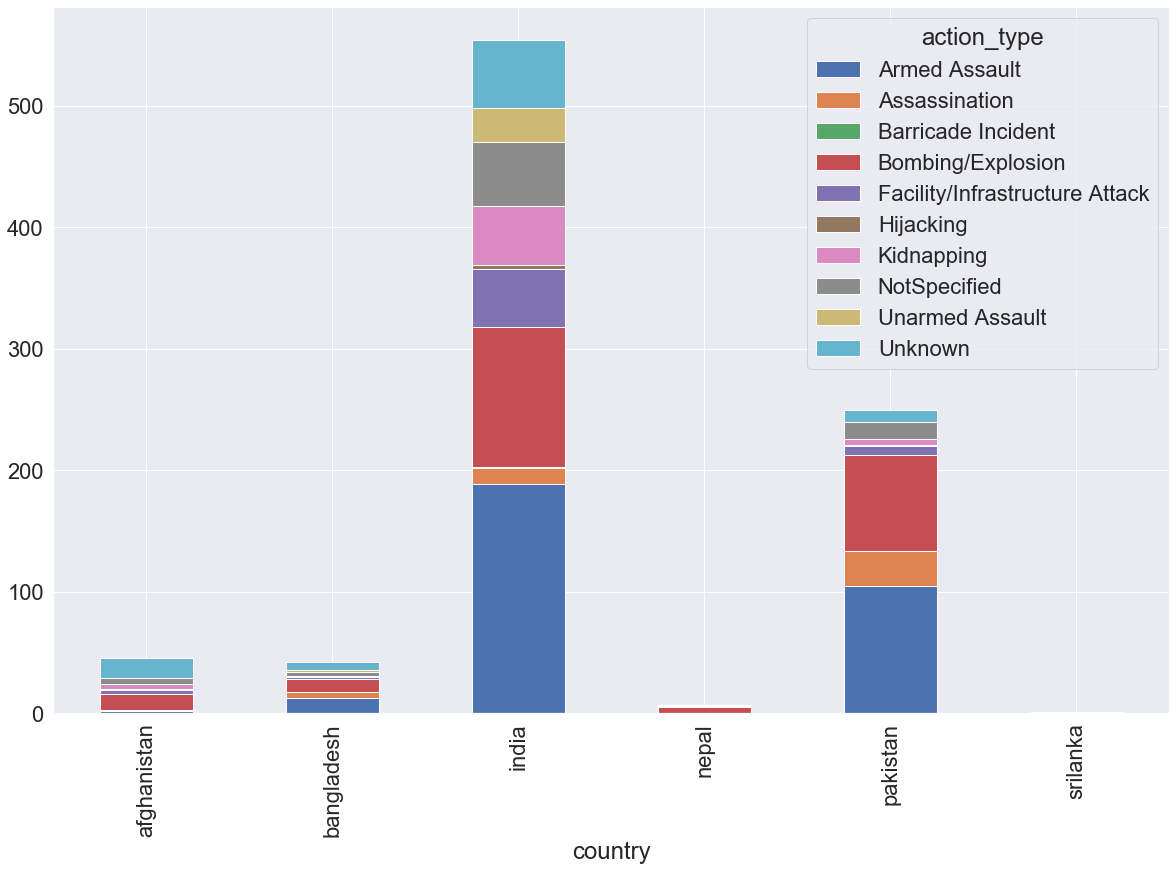

In [53]:
# Set the font size
sns.set(font_scale = 2)

# Create figure frame 
plt.figure(figsize=(10,5))

# Plot the figure
chart = aggregated.plot(kind='bar',stacked=True)

# Time Series

Create a data frame ofr time

In [54]:
df_time = df.copy()
df_time = df_time.explode('year')
df_time.head(5)

,id,is_relevant,target,source,action,action_type,location,date,country,year,news,target_group,action_group,source_group
0,32355,True,"[Military Police, Rangers]","[Lashkar e Jhangvi LeJ, militants]","[killing, gunned, killed]",[Armed Assault],[Karachi],[December 6],pakistan,2016,Two Lashkar e Jhangvi LeJ militants Asim alias...,[Military],"[gun attack, killed]","[Attackers, Lashkar e Jhangvi]"
1,32398,True,"[SFs, Security Forces, civilians]",[NotSpecified],"[wounded, fighting, killing, killed]",[Unknown],[NotSpecified],[December 20],pakistan,2016,The Commander Southern Command Lieutenant Gene...,"[Private Citizen and Property, Military]","[wounded, fighting, killed]",[Unknown Source]
2,29171,True,"[Naga, Nagas]","[Manipur Naga Peopleâ€™s Front, MNPF]","[exploded, bomb, attack, explosion]",[Bombing/Explosion],[NotSpecified],[August 30],india,2016,Meanwhile the underground organization Manipur...,[Naga National Council],"[bomb, attack, exploded]",[Manipur Naga Peoples Front]
3,25445,True,"[Artisan Restaurant, hostages, foreigners]","[suicide soldiers, attackers, suicide fighters]","[gun battle, killing, injuring]",[Armed Assault],[Dhaka],"[August, 27th]",bangladesh,2016,Islamic State IS in the latest issue of its on...,"[Private Citizen and Property, Business]","[gun attack, injured, killed]",[Attackers]
4,31739,True,"[Muttahida Qaumi Movement, MQM]",[NotSpecified],[shot],[Assassination],"[Sindh, Korangi, Naeemabad, Karachi]",[June 19],pakistan,2016,A senior Muttahida Qaumi Movement MQM worker i...,[Muttahida Qaumi Movement],[shot],[Unknown Source]


Pivot the database by year and country

In [55]:
time = df_time.pivot_table(index = 'year', columns = 'country', aggfunc='size', fill_value=0)
time

country,afghanistan,bangladesh,india,nepal,pakistan,srilanka
year,,,,,,
2016,2,26,322,3,188,1
2017,0,7,60,4,18,0
2018,36,0,48,0,12,0


Plot time series

<Figure size 1440x936 with 0 Axes>

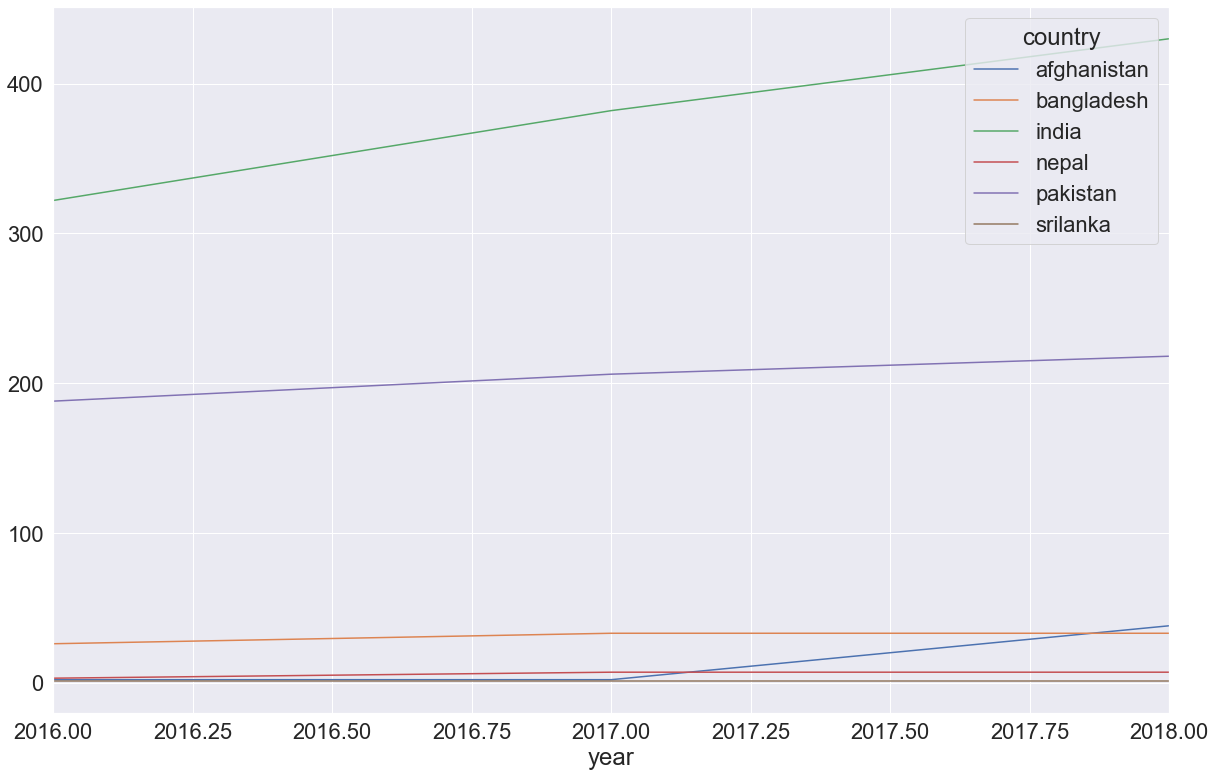

In [56]:
time = time.cumsum()
plt.figure();
time.plot.line();

# Source by country

Still is pretty messy.  We have to do a lot for data cleaning.


Create dataframe by terrorist organization by country

In [57]:
df_source = df.copy()
df_source = df_source.explode('source_group')
df_source.head(5)

,id,is_relevant,target,source,action,action_type,location,date,country,year,news,target_group,action_group,source_group
0,32355,True,"[Military Police, Rangers]","[Lashkar e Jhangvi LeJ, militants]","[killing, gunned, killed]",[Armed Assault],[Karachi],[December 6],pakistan,2016,Two Lashkar e Jhangvi LeJ militants Asim alias...,[Military],"[gun attack, killed]",Attackers
0,32355,True,"[Military Police, Rangers]","[Lashkar e Jhangvi LeJ, militants]","[killing, gunned, killed]",[Armed Assault],[Karachi],[December 6],pakistan,2016,Two Lashkar e Jhangvi LeJ militants Asim alias...,[Military],"[gun attack, killed]",Lashkar e Jhangvi
1,32398,True,"[SFs, Security Forces, civilians]",[NotSpecified],"[wounded, fighting, killing, killed]",[Unknown],[NotSpecified],[December 20],pakistan,2016,The Commander Southern Command Lieutenant Gene...,"[Private Citizen and Property, Military]","[wounded, fighting, killed]",Unknown Source
2,29171,True,"[Naga, Nagas]","[Manipur Naga Peopleâ€™s Front, MNPF]","[exploded, bomb, attack, explosion]",[Bombing/Explosion],[NotSpecified],[August 30],india,2016,Meanwhile the underground organization Manipur...,[Naga National Council],"[bomb, attack, exploded]",Manipur Naga Peoples Front
3,25445,True,"[Artisan Restaurant, hostages, foreigners]","[suicide soldiers, attackers, suicide fighters]","[gun battle, killing, injuring]",[Armed Assault],[Dhaka],"[August, 27th]",bangladesh,2016,Islamic State IS in the latest issue of its on...,"[Private Citizen and Property, Business]","[gun attack, injured, killed]",Attackers


Now, pivot the database for countries and terrorist organizations

In [58]:
source = df_source.pivot_table(index = 'country', columns = 'source_group', aggfunc='size', fill_value=0)
source

source_group,Achik Songna Anchakgipa Kotok,Afghan Intelligence Agency spy,Akhil Tarai Janatantrik Tarai Mukti Morcha,Al Qaeda,Andhra Odisha Special Zonal Committee,Ansarullah Bangla Team,Armed Garo National Liberation Army,Attackers,Baloch Liberation Army,Balochistan Liberation Front,...,Sindhudesh Revolutionary Party,Taliban,Tritiya Prastuti Committee,United Achik Liberation Army,United Liberation Front of Asom Independent,United National Liberation Front,Unknown,Unknown Source,fidayeen,nan
country,,,,,,,,,,,,,,,,,,,,,
afghanistan,0,0,0,0,0,0,0,13,0,0,...,0,16,0,0,0,0,0,8,0,0
bangladesh,0,0,0,1,0,1,0,17,0,0,...,0,0,0,0,0,0,0,4,0,0
india,1,0,0,0,1,0,1,267,0,1,...,0,3,3,1,2,3,5,28,1,1
nepal,0,0,1,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,2,0,0
pakistan,0,1,0,3,0,0,0,154,2,1,...,1,19,0,0,0,0,3,52,0,1
srilanka,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Generate a plot for different actions per country

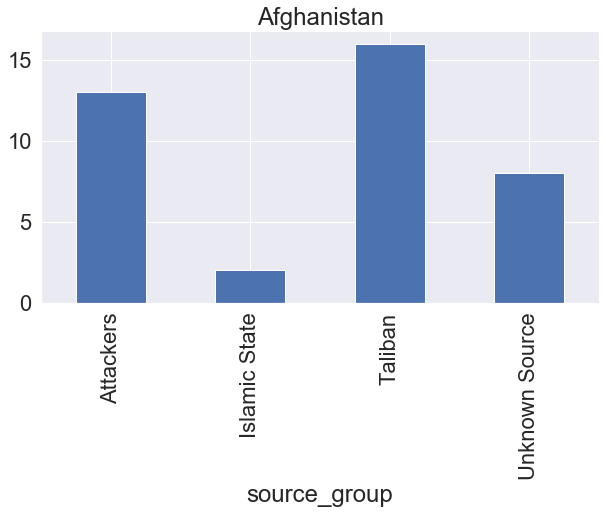

In [59]:
# Set the font size
sns.set(font_scale = 2)

# Create figure frame 
plt.figure(figsize=(10,5))


# Plot Afghanistan
df0=source.iloc[0,:]                                        # Select row for Afghanistan 
chart = df0[df0 > 0].plot(kind='bar', title="Afghanistan")  # Plot values grater than zero


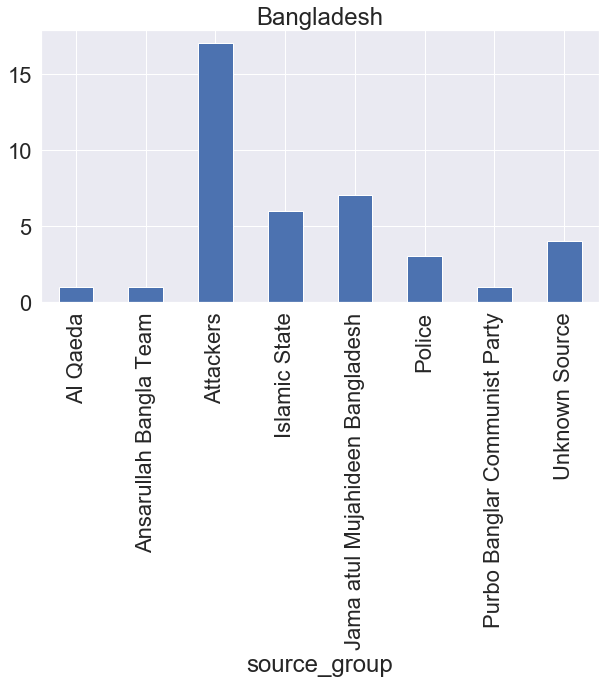

In [60]:
# Set the font size
sns.set(font_scale = 2)

# Create figure frame 
plt.figure(figsize=(10,5))

# Plot Bangladesh
df1=source.iloc[1,:]                                        # Select row for Bangladesh 
chart = df1[df1 > 0].plot(kind='bar', title="Bangladesh")  # Plot values grater than zero

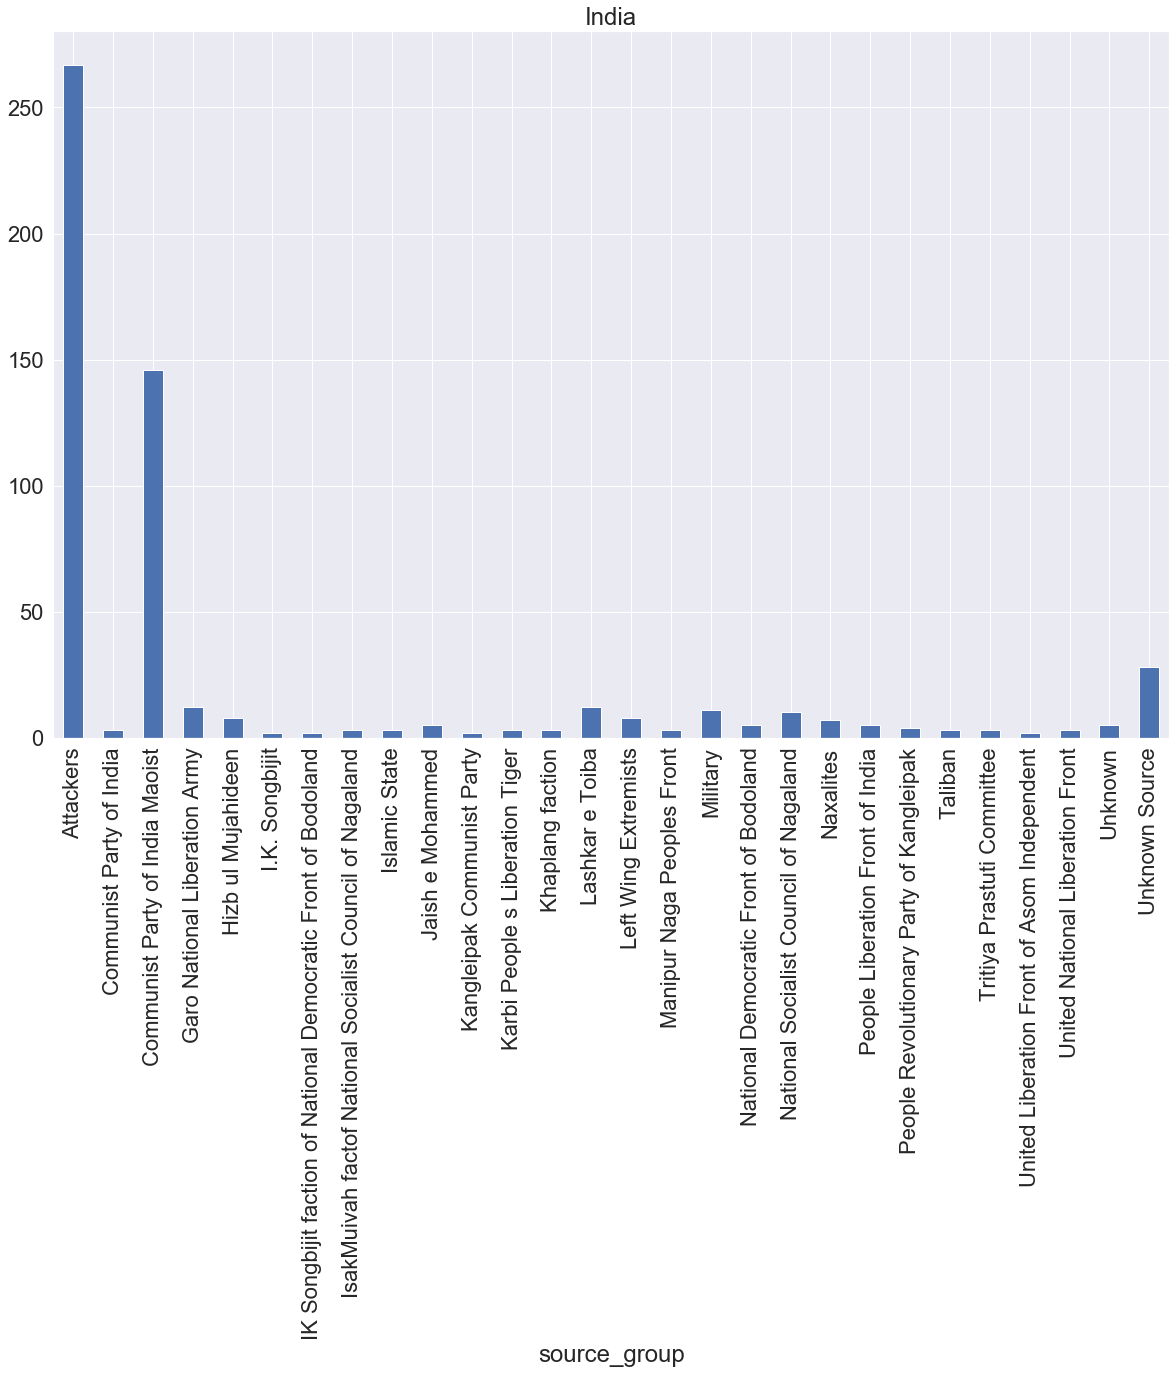

In [61]:
# Set the font size
#sns.set(font_scale = 2)

# Create figure frame 
#plt.figure(figsize=(10,5))

# Plot India
df2=source.iloc[2,:]                                  # Select row for India 
chart = df2[df2 > 1].plot(kind='bar', title="India")  # Plot values grater than zero

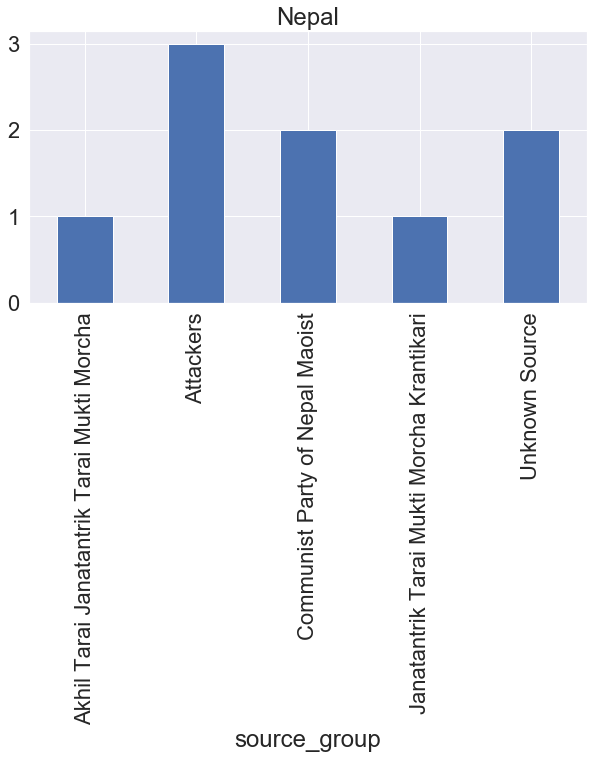

In [62]:
# Set the font size
sns.set(font_scale = 2)

# Create figure frame 
plt.figure(figsize=(10,5))

# Plot Nepal
df3=source.iloc[3,:]                                  # Select row for Nepal 
chart = df3[df3 > 0].plot(kind='bar', title="Nepal")  # Plot values grater than zero

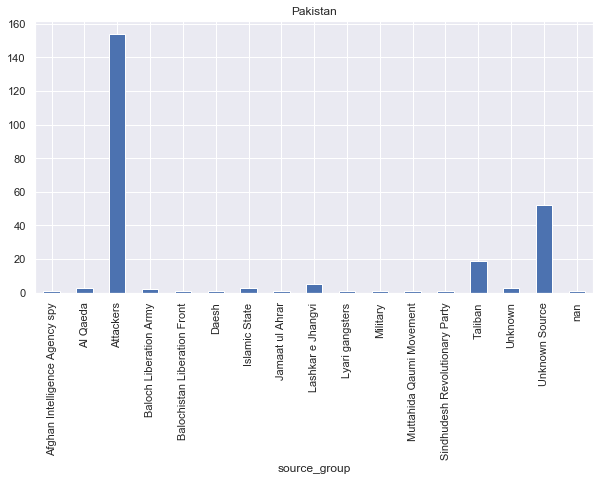

In [63]:
# Set the font size
sns.set(font_scale = 1)

# Create figure frame 
plt.figure(figsize=(10,5))

# Plot Pakistan
df4=source.iloc[4,:]                                     # Select row for Pakistan 
chart = df4[df4 > 0].plot(kind='bar', title="Pakistan")  # Plot values grater than zero

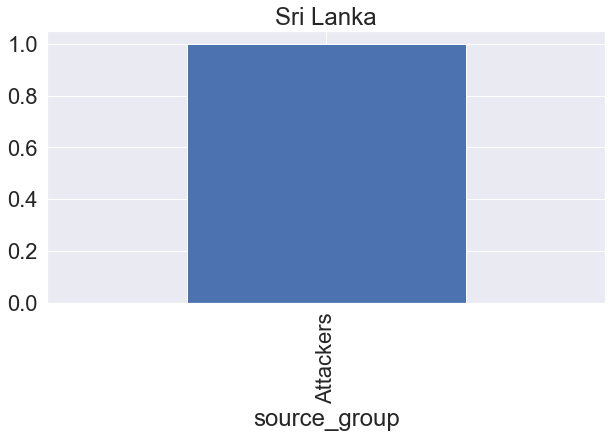

In [64]:
# Set the font size
sns.set(font_scale = 2)

# Create figure frame 
plt.figure(figsize=(10,5))

# Plot Pakistan
df5=source.iloc[5,:]                                     # Select row for Pakistan 
chart = df5[df5 > 0].plot(kind='bar', title="Sri Lanka")  # Plot values grater than zero

# Target By Country

In [65]:
df_target = df.copy()
df_target = df_target.explode('target_group')
df_target.head(5)


,id,is_relevant,target,source,action,action_type,location,date,country,year,news,target_group,action_group,source_group
0,32355,True,"[Military Police, Rangers]","[Lashkar e Jhangvi LeJ, militants]","[killing, gunned, killed]",[Armed Assault],[Karachi],[December 6],pakistan,2016,Two Lashkar e Jhangvi LeJ militants Asim alias...,Military,"[gun attack, killed]","[Attackers, Lashkar e Jhangvi]"
1,32398,True,"[SFs, Security Forces, civilians]",[NotSpecified],"[wounded, fighting, killing, killed]",[Unknown],[NotSpecified],[December 20],pakistan,2016,The Commander Southern Command Lieutenant Gene...,Private Citizen and Property,"[wounded, fighting, killed]",[Unknown Source]
1,32398,True,"[SFs, Security Forces, civilians]",[NotSpecified],"[wounded, fighting, killing, killed]",[Unknown],[NotSpecified],[December 20],pakistan,2016,The Commander Southern Command Lieutenant Gene...,Military,"[wounded, fighting, killed]",[Unknown Source]
2,29171,True,"[Naga, Nagas]","[Manipur Naga Peopleâ€™s Front, MNPF]","[exploded, bomb, attack, explosion]",[Bombing/Explosion],[NotSpecified],[August 30],india,2016,Meanwhile the underground organization Manipur...,Naga National Council,"[bomb, attack, exploded]",[Manipur Naga Peoples Front]
3,25445,True,"[Artisan Restaurant, hostages, foreigners]","[suicide soldiers, attackers, suicide fighters]","[gun battle, killing, injuring]",[Armed Assault],[Dhaka],"[August, 27th]",bangladesh,2016,Islamic State IS in the latest issue of its on...,Private Citizen and Property,"[gun attack, injured, killed]",[Attackers]


In [66]:
target = df_target.pivot_table(index = 'country', columns = 'target_group', aggfunc='size', fill_value=0)
target

target_group,Airports and Aircraft,All India United Democratic Front,Awami National Party,Bharatiya Janata Party,Business,Communist Party of India Maoist,Communist Party of Nepal Maoist,Educational Institution,Food and Water Supply,Government,...,Terrorist,Tourist,Transportation,Tritiya Prastuti Committee,Unknown,Unknown Target,Violent Political Parties,Wolesi Jirga,naka party,nan
country,,,,,,,,,,,,,,,,,,,,,
afghanistan,1,0,0,0,0,0,0,1,0,3,...,0,0,1,0,1,2,0,1,0,2
bangladesh,0,0,0,0,3,0,0,3,0,3,...,0,1,0,0,0,1,1,0,0,0
india,0,1,0,3,7,4,0,10,2,33,...,3,0,31,4,10,19,2,0,1,0
nepal,0,0,0,0,0,0,1,0,0,4,...,1,0,2,0,0,2,0,0,0,0
pakistan,0,0,2,0,2,0,0,9,0,27,...,1,2,6,0,3,5,0,0,0,0
srilanka,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


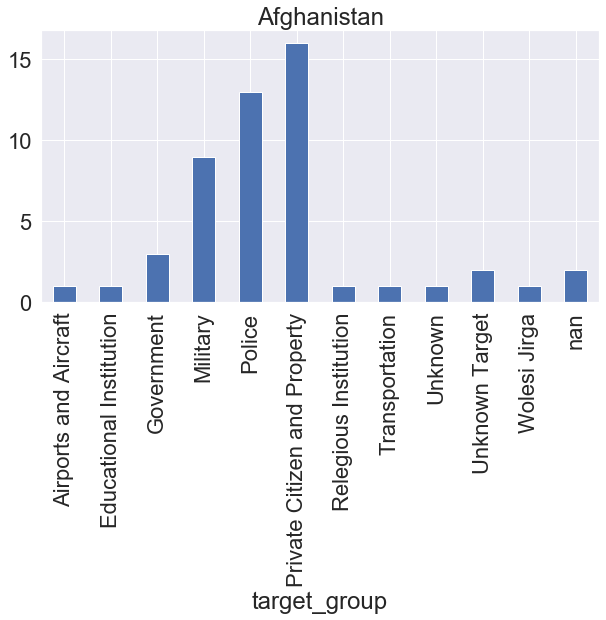

In [67]:
# Set the font size
sns.set(font_scale = 2)

# Create figure frame 
plt.figure(figsize=(10,5))

# Plot Bangladesh
df1=target.iloc[0,:]                                        # Select row for Afghanistan 
chart = df1[df1 > 0].plot(kind='bar', title="Afghanistan")  # Plot values grater than zero

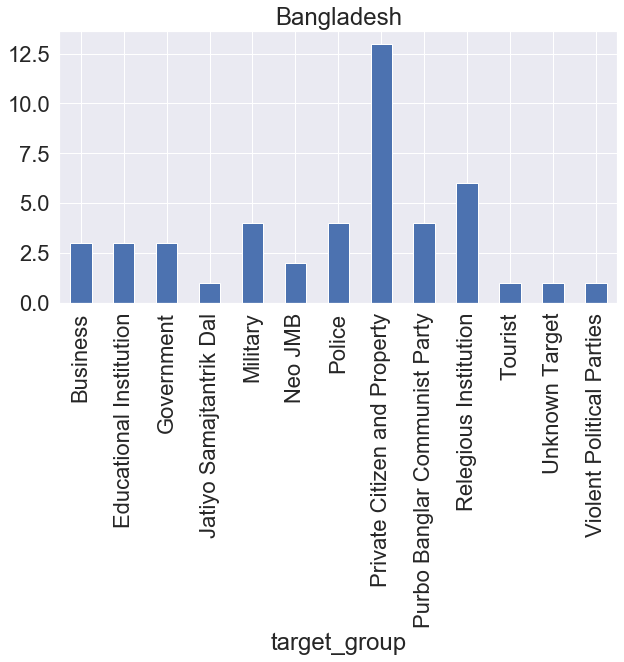

In [68]:
# Set the font size
sns.set(font_scale = 2)

# Create figure frame 
plt.figure(figsize=(10,5))

# Plot Bangladesh
df1=target.iloc[1,:]                                        # Select row for Afghanistan 
chart = df1[df1 > 0].plot(kind='bar', title="Bangladesh")  # Plot values grater than zero

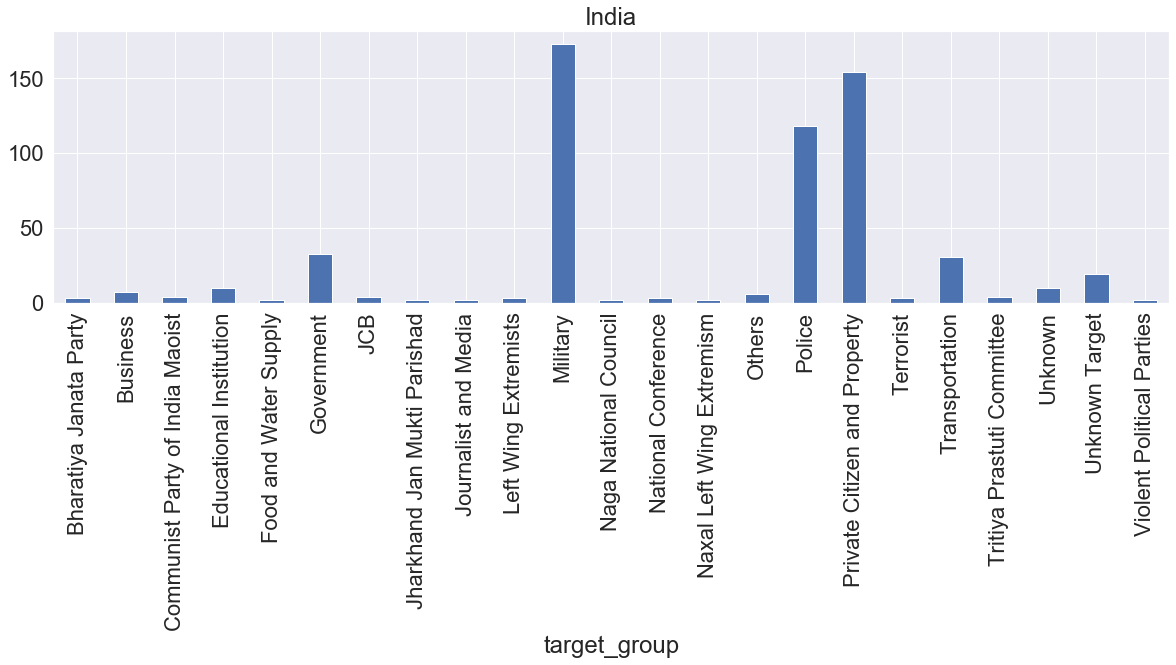

In [69]:
# Set the font size
sns.set(font_scale = 2)

# Create figure frame 
plt.figure(figsize=(20,5))
# Plot India
df2=target.iloc[2,:]                                  # Select row for India 
chart = df2[df2 > 1].plot(kind='bar', title="India")  # Plot values grater than zero

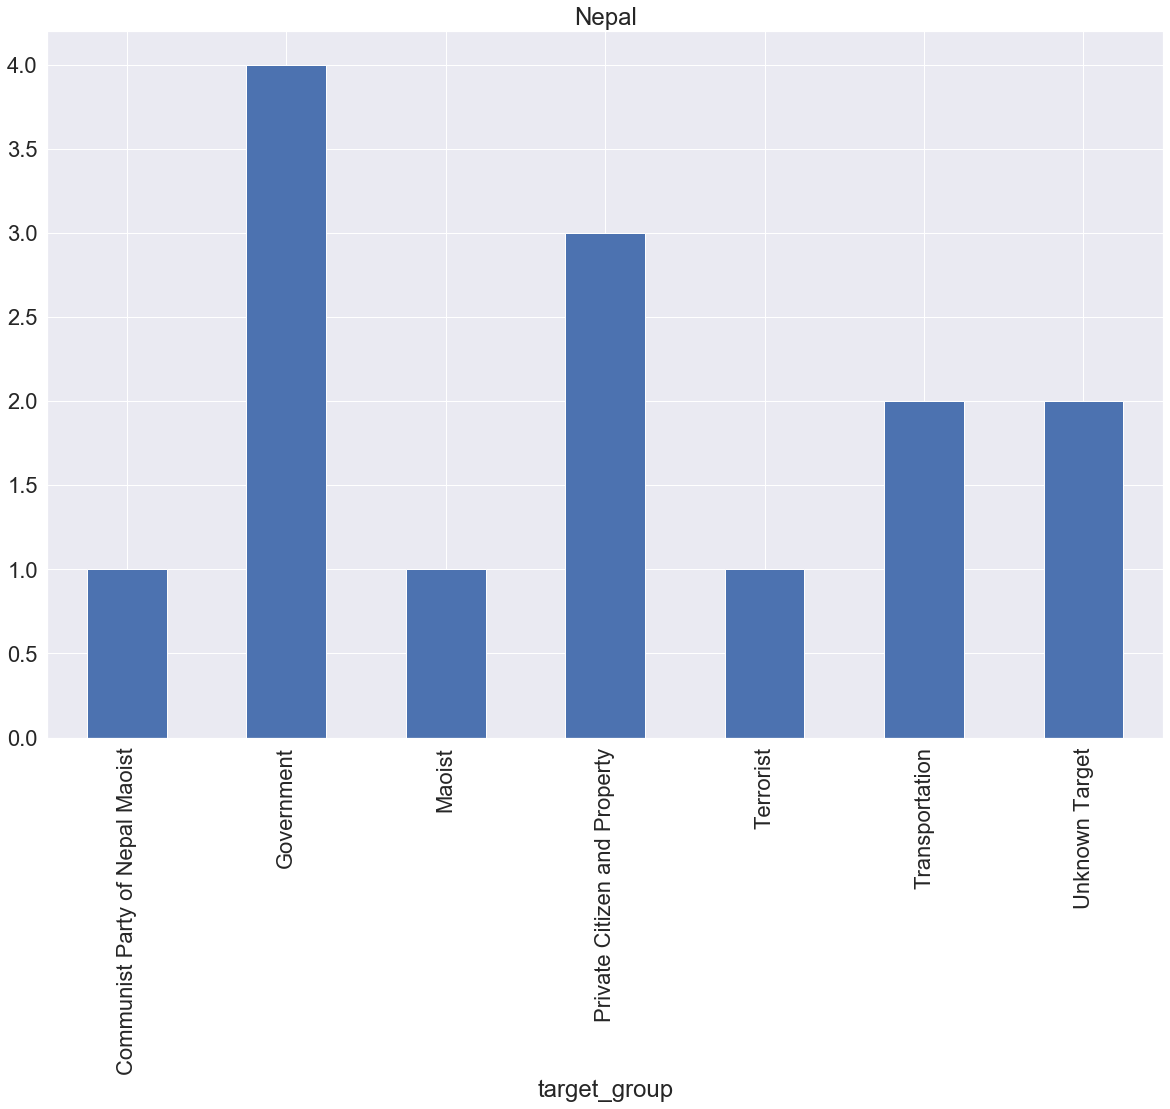

In [70]:
# Plot Nepal
df3=target.iloc[3,:]                                  # Select row for Nepal 
chart = df3[df3 > 0].plot(kind='bar', title="Nepal")  # Plot values grater than ze

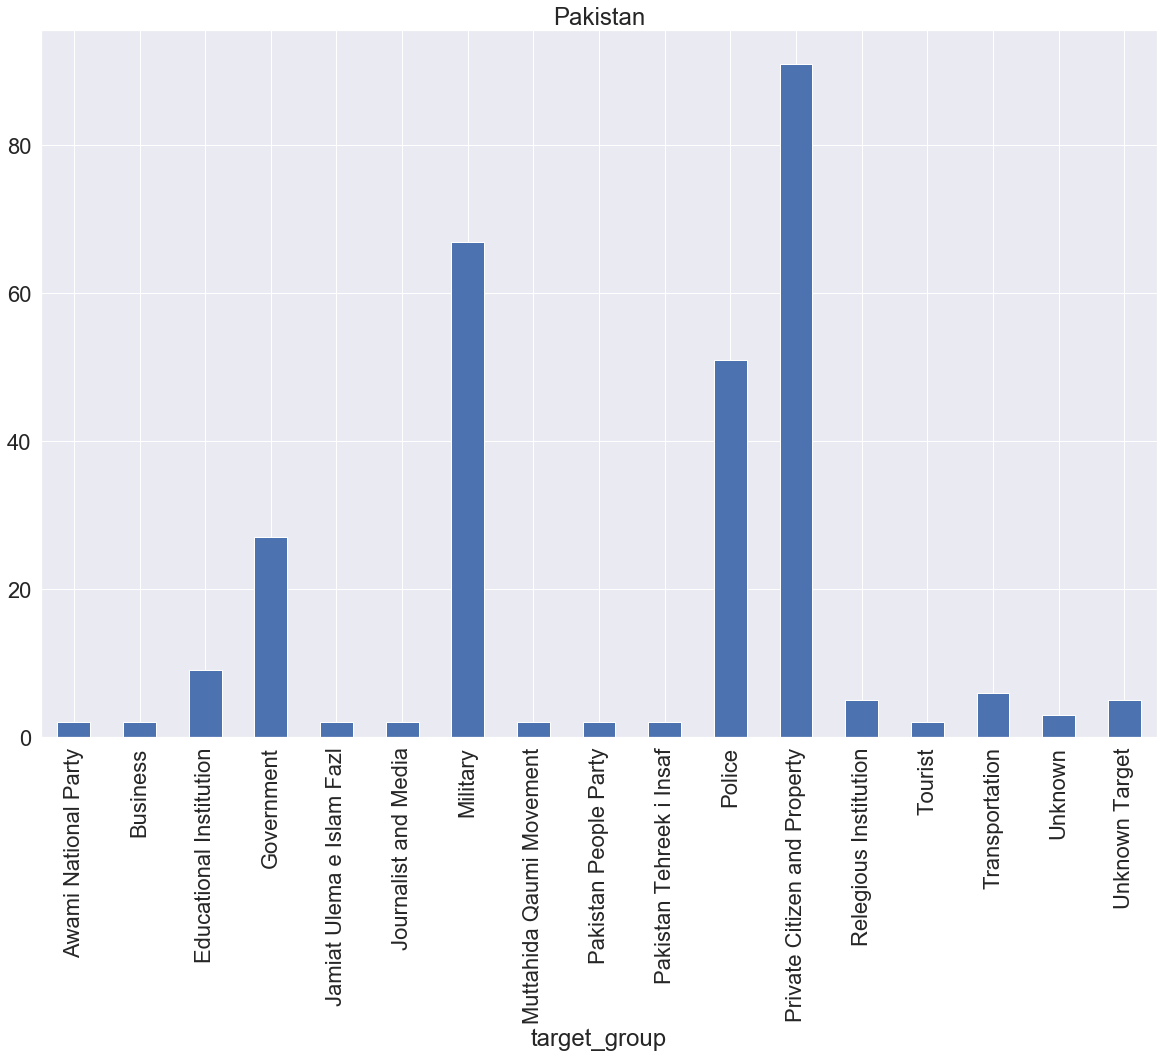

In [71]:
# Plot Nepal
df3=target.iloc[4,:]                                  # Select row for Pakistan 
chart = df3[df3 > 1].plot(kind='bar', title="Pakistan")  # Plot values grater than ze

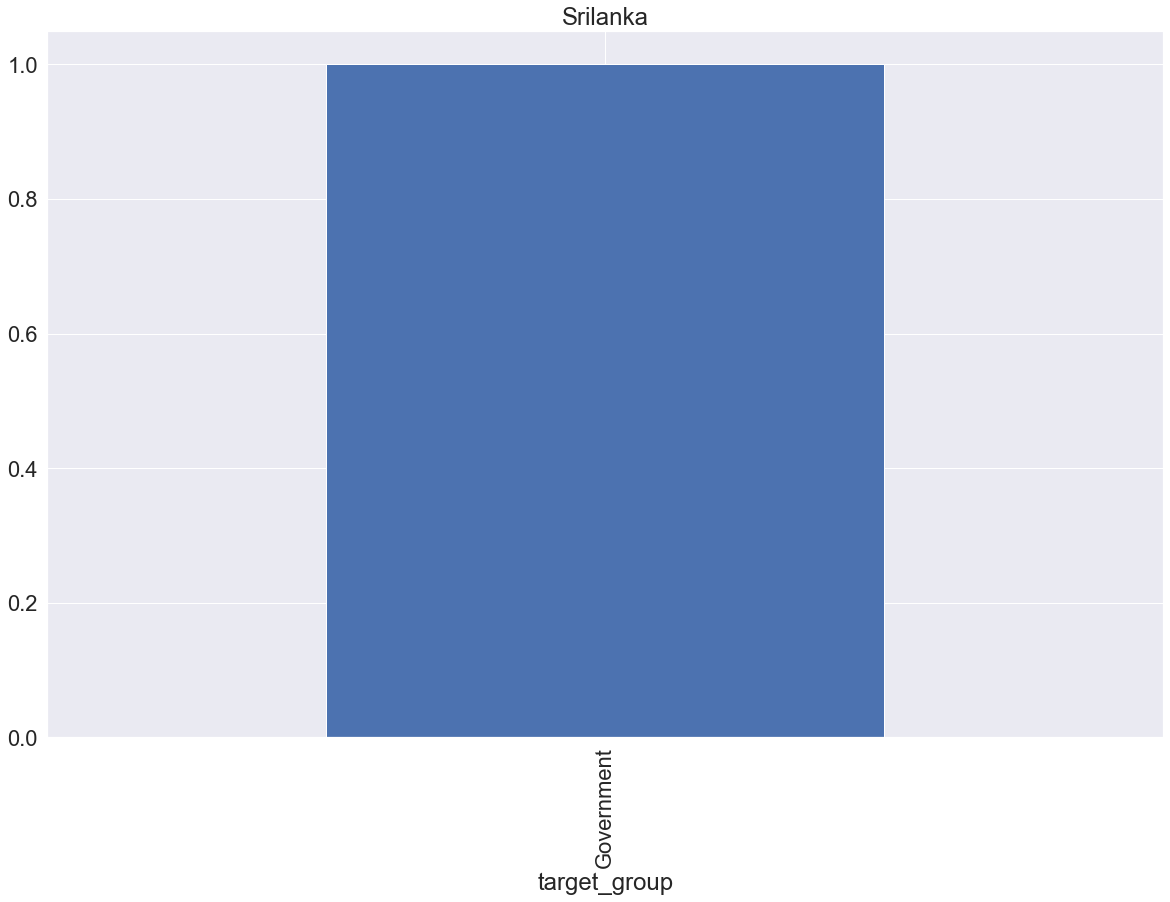

In [72]:
# Plot Nepal
df3=target.iloc[5,:]                                  # Select row for Srilanka 
chart = df3[df3 > 0].plot(kind='bar', title="Srilanka")  # Plot values grater than ze

# Hola Shahreen :)